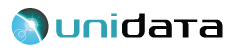
# Introduction to MetPy Prerequisite Lessons
## Foundations in Cartopy Activity Notebook

<br>
<p><b>How to use this Notebook:</b><br>
This notebook pairs with the <i>Foundations in Cartopy</i> lesson. <br>
Follow along with the instructions presented in the lesson, then  <br>
return to this notebook when prompted. After an activity, you  <br>
will be prompted to return to the lesson to proceed. </p>

### Activity 0: Import required packages

In [1]:
## CELL 0A
## INSTRUCTIONS: Run this cell

# import cartopy (coordinate reference system class) using the standard abbreviation
import cartopy.crs as ccrs

# import matplotlib using the standard abbreviation
import matplotlib.pyplot as plt

# import numpy for creating data in a later step
import numpy as np

### Activity 1: Getting started with Cartopy
The cell below matches the code samples provided in the lesson. Run the cell to examine the output.

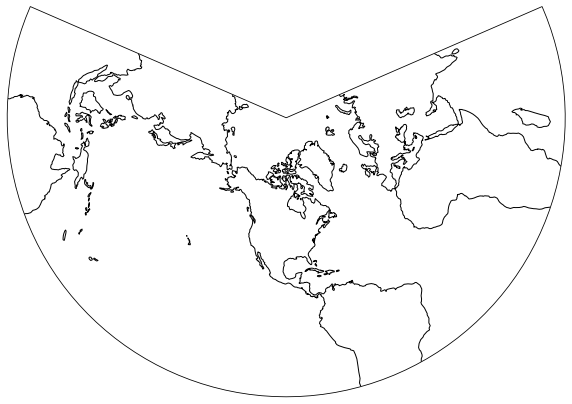

In [2]:
## CELL 1A 
## INSTRUCTIONS: Run this cell

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection=ccrs.LambertConformal())
ax.coastlines()

Now try creating your own plot with any of the projections available from Cartopy and add coastlines for reference.<br> 
<a href="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html" target="blank">Click here to view all available projections.</a>

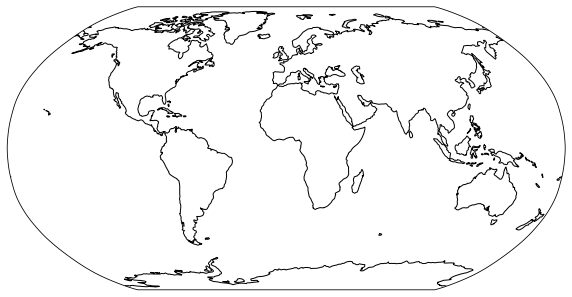

In [3]:
## CELL 1B
## INSTRUCTIONS: Create your own plot with any of the projections available from Cartopy and add coastlines for reference.


#answer: 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection=ccrs.Robinson())
ax.coastlines()

## When the above activity is complete, save this notebook and return to the course tab

### Activity 2: Explore projections and transformations

In the following exercises you will explore the necessity of knowing how your geographic data are defined with respect to referencing on a globe. We will prove this by creating our own data with a known coordinate reference system, and plotting it on different projected axes. 

#### Create and examine geographic data
Create data in the cells below, then examine.

In [4]:
## CELL 2A 
## INSTRUCTIONS: Run this cell to create working data

# Create 1D arrays of longitudes and latitudes
# in units of DEGREES
lon1d = np.linspace(0, 180, 30)
lat1d = np.linspace(0, 90, 30)

# Create 2D arrays of longitudes and latitudes
lon, lat = np.meshgrid(lon1d, lat1d)

# Create "data"
dat = np.cos(np.deg2rad(lat) * 3) + np.sin(np.deg2rad(lon) * 1)


Let's now examine the arrays we'll be working with. What shape are each of the arrays (lat, lon, dat)? What do they look like?

In [5]:
## CELL 2B
## INSTRUCTIONS: Predict what the output of this cell will be, then run this cell

print("Size of lat: "+str(lat.shape[0])+" columns, "+str(lat.shape[1])+" rows")
print("Size of lon: "+str(lon.shape[0])+" columns, "+str(lon.shape[1])+" rows")
print("Size of dat: "+str(dat.shape[0])+" columns, "+str(dat.shape[1])+" rows")

Size of lat: 30 columns, 30 rows
Size of lon: 30 columns, 30 rows
Size of dat: 30 columns, 30 rows


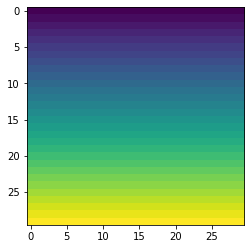

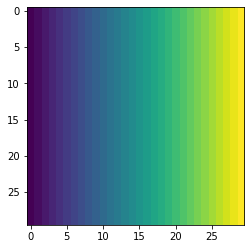

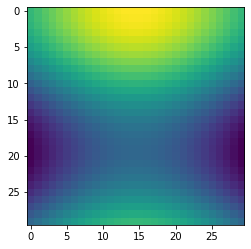

In [6]:
## CELL 2C
## INSTRUCTIONS: Plot the all three arrays (lat, lon, dat) using any method of your choosing - do not use any projected axes



# answer:
fig1 = plt.figure()
plt.imshow(lat)
fig2 = plt.figure()
plt.imshow(lon)
fig3 = plt.figure()
plt.imshow(dat)

Now we know that all three arrays are of equal size and shape. What we can deduce from this is that each cell in our data array has some latitude and longitude value associated with it. This is what powers Cartopy to place our data arrays on a geographic map. 

#### Create projected axes and plot data
Now let's plot these data onto projected axes as filled contours. The projection we will use is Plate Carree. This coordinate reference system uses degrees as its unit of measure, consistent with the units of the lat and lon arrays we just created. 

When referencing geographic data on projected axes with Cartopy, it's important to include the longitude and latitude arrays as input to the plotting function. 

`ax.contourf(longitudes, latitudes, data)`

Note that you can include x and y arrays to non-geographic matplotlib plots as well, however, they are imperative to include in geographic plots so that the data display in the correct location. 

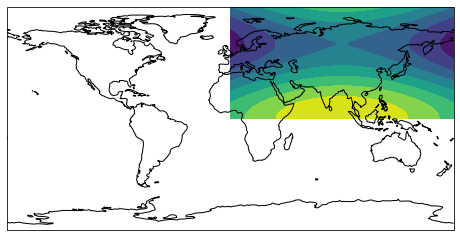

In [7]:
## CELL 2D
## INSTRUCTIONS: Run this cell to plot the data array on Plate Caree projected axes. 

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(lon, lat, dat)

# Use the set_global() method to set the axes extent to the projection's full extent
ax.set_global()

The data array covers the eastern portion of the northern hemisphere, which is consistent with the latitude and longitude values we provided in CELL 2A. 

Let's now change the projection of the axes to a Rotated Pole. 

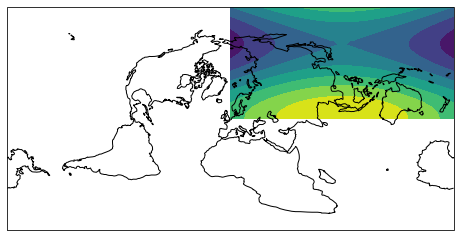

In [8]:
## CELL 2E
## INSTRUCTIONS: Run this cell to plot the data array on Rotated Pole projected axes.

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection=ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5))
ax.coastlines()
ax.contourf(lon, lat, dat)
ax.set_global()

Instead of data drawing over Asia, eastern Eurpose, and the northern portions of Africa, we see the array over Australia and New Zealand. 

Cartopy assumes that the data array were defined using the same coordinate reference system as the axes, Rotated Pole. Since we didn't tell Cartopy what coordinate reference system the data were defined in, the data draw in the incorrect place relative to the globe. 

To flag the coordinate reference system that the data were defined in, we use the `transform` keyword in the plotting function. 

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Tip</p>
    Best practice is to always use the <code>transform</code> keyword when plotting geographic data with Cartopy, even when the data are defined in the same coordinate reference system as the projected axes. 
</div>


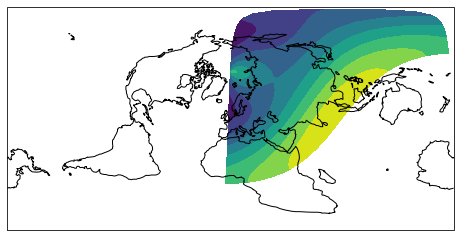

In [9]:
## CELL 2F
## INSTRUCTIONS: Run this cell to plot the data array correctly transformed on Rotated Pole projected axes.

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection=ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5))
ax.coastlines()
ax.contourf(lon, lat, dat, transform=ccrs.PlateCarree())
ax.set_global()

The data array has correctly transformed itself to display on the Rotated Pole projected axes. 

Now try to plot the same data on <b>Mercator</b> projected axes. Refer to the <a href="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#mercator" target="blank">Cartopy documentation for the projection definition</a>.

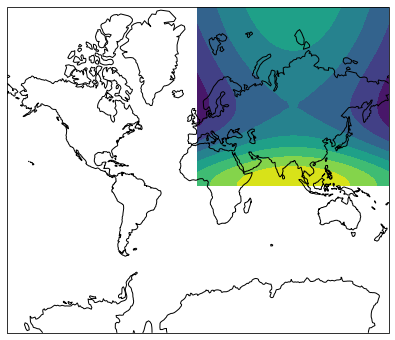

In [10]:
## CELL 2G
## INSTRUCTIONS: Create a plot of the data array from above on Mercator axes



# answer:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection=ccrs.Mercator())
ax.coastlines()
ax.contourf(lon, lat, dat, transform=ccrs.PlateCarree())
ax.set_global()

## When the above activity is complete, save this notebook and return to the course tab